For right now, I wanted to make a google colab so we can both work on this at the same time. Not sure if we can do that on the VSC with flask.

sounds good, we can always import to VS later

Sounds like a plan.

In [1]:
!pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle as pk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google.colab'

In [40]:
df = pd.read_csv('/Users/vbono/Documents/computer-science/ai/final-proj/tracks_features.csv')

df.head()

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02


In [41]:
df.dtypes

id                   object
name                 object
album                object
album_id             object
artists              object
artist_ids           object
track_number          int64
disc_number           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature      float64
year                  int64
release_date         object
dtype: object

In [42]:
df.columns

Index(['id', 'name', 'album', 'album_id', 'artists', 'artist_ids',
       'track_number', 'disc_number', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'year', 'release_date'],
      dtype='object')

In [45]:
df_copy = df.copy()

df_copy = df_copy.drop(columns=['id', 'name', 'album', 'album_id', 'artists', 'artist_ids', 'track_number', 'mode', 'disc_number', 'year', 'release_date', 'duration_ms', 'time_signature'], axis=1)
df_copy.isnull().sum()

columns = ['explicit', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

In [46]:
df_copy.dtypes

explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
dtype: object

In [50]:
label_encoder_map = {}
print('good')

#convert strings to lowercase
df_copy = df_copy.map(lambda s:s.lower() if type(s) == str else s)
print('good')

#encode only those we're interested in
df_encoded_labels = df_copy.copy()
print('good')

# create map - 
for i in range(1):
    print('IN FOR LOOP')
    labels = df_copy[columns[i]].astype('category').cat.categories.tolist()
    print('good')
    replace_map_comp = {columns[i] : {k :v for k, v in zip( labels, list(range(0, len(labels))))}}
    print('good')

    # each replace map is for a column and is added to the total data encoder map
    label_encoder_map.update(replace_map_comp)
    print('good')
    # replace the data with the encoded values according the our map
    df_encoded_labels.replace(replace_map_comp, inplace=True)
    print('good')

good
good
good
IN FOR LOOP
good
good
good
good


In [51]:
df_encoded_labels

,explicit,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,0.470,0.978,7,-5.399,0.0727,0.02610,0.000011,0.3560,0.503,117.906
1,1,0.599,0.957,11,-5.764,0.1880,0.01290,0.000071,0.1550,0.489,103.680
2,0,0.315,0.970,7,-5.424,0.4830,0.02340,0.000002,0.1220,0.370,149.749
3,1,0.440,0.967,11,-5.830,0.2370,0.16300,0.000004,0.1210,0.574,96.752
4,0,0.426,0.929,2,-6.729,0.0701,0.00162,0.105000,0.0789,0.539,127.059
...,...,...,...,...,...,...,...,...,...,...,...
1204020,0,0.264,0.966,5,-6.970,0.0672,0.00935,0.002240,0.3370,0.415,159.586
1204021,0,0.796,0.701,11,-6.602,0.0883,0.10400,0.644000,0.0749,0.781,121.980
1204022,0,0.785,0.796,9,-5.960,0.0564,0.03040,0.918000,0.0664,0.467,121.996
1204023,0,0.665,0.856,6,-6.788,0.0409,0.00007,0.776000,0.1170,0.227,124.986


In [52]:
x = df_encoded_labels.drop(columns=['danceability'])

df_encoded_labels['danceability'] = df_encoded_labels['danceability'].apply(lambda x: 1 if x > 0.5 else 0)
y = df_encoded_labels['danceability'].round(1)

In [81]:
df_encoded_labels = df_encoded_labels.fillna(df_encoded_labels.mean())
df_encoded_labels.head()

,explicit,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,0,0.978,7,-5.399,0.0727,0.02610,0.000011,0.3560,0.503,117.906
1,1,1,0.957,11,-5.764,0.1880,0.01290,0.000071,0.1550,0.489,103.680
2,0,0,0.970,7,-5.424,0.4830,0.02340,0.000002,0.1220,0.370,149.749
3,1,0,0.967,11,-5.830,0.2370,0.16300,0.000004,0.1210,0.574,96.752
4,0,0,0.929,2,-6.729,0.0701,0.00162,0.105000,0.0789,0.539,127.059


In [84]:
pk.dump(label_encoder_map, open("label_encoder_map.pkl", "wb"))

In [53]:
scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.transform(x)

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [55]:
x_train

array([[0.        , 0.94      , 0.09090909, ..., 0.264     , 0.253     ,
        0.35577302],
       [0.        , 0.844     , 0.81818182, ..., 0.164     , 0.0773    ,
        0.4389999 ],
       [0.        , 0.346     , 0.        , ..., 0.218     , 0.298     ,
        0.3983827 ],
       ...,
       [0.        , 0.976     , 0.09090909, ..., 0.355     , 0.286     ,
        0.52219062],
       [0.        , 0.678     , 0.81818182, ..., 0.0775    , 0.666     ,
        0.40162453],
       [0.        , 0.847     , 0.        , ..., 0.108     , 0.453     ,
        0.59434629]])

In [56]:
y_train

821650     0
381110     0
156362     0
546023     1
353155     1
          ..
739125     0
341348     1
866178     0
26518      1
1046049    1
Name: danceability, Length: 842817, dtype: int64

In [64]:
model = Sequential()

model.add(Dense(32, input_dim=10, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [65]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [66]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                352       
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 8)                 136       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1025 (4.00 KB)
Trainable params: 1025 (4.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:
x.shape

(1204025, 10)

In [68]:
y.shape

(1204025,)

In [69]:
history = model.fit(x_train, y_train, epochs=50, batch_size=1000)

Epoch 1/50
843/843 [==============================] - 1s 730us/step - loss: 0.5161 - accuracy: 0.7416
Epoch 2/50
843/843 [==============================] - 1s 767us/step - loss: 0.4691 - accuracy: 0.7717
Epoch 3/50
843/843 [==============================] - 1s 729us/step - loss: 0.4619 - accuracy: 0.7762
Epoch 4/50
843/843 [==============================] - 1s 740us/step - loss: 0.4588 - accuracy: 0.7782
Epoch 5/50
843/843 [==============================] - 1s 755us/step - loss: 0.4571 - accuracy: 0.7786
Epoch 6/50
843/843 [==============================] - 1s 732us/step - loss: 0.4558 - accuracy: 0.7797
Epoch 7/50
843/843 [==============================] - 1s 723us/step - loss: 0.4547 - accuracy: 0.7801
Epoch 8/50
843/843 [==============================] - 1s 734us/step - loss: 0.4538 - accuracy: 0.7807
Epoch 9/50
843/843 [==============================] - 1s 722us/step - loss: 0.4531 - accuracy: 0.7813
Epoch 10/50
843/843 [==============================] - 1s 712us/step - loss: 0.452

In [70]:
model.evaluate(x_test, y_test)[1]

11288/11288 [==============================] - 4s 346us/step - loss: 0.4401 - accuracy: 0.7903


0.7903479337692261

In [71]:
y_pred = model.predict(x_test)


result = pd.DataFrame({  'ground truth': y_test, 'pred': y_pred.flatten() })
result
result.head(30)

11288/11288 [==============================] - 3s 288us/step


,ground truth,pred
455860,0,0.050444
599719,1,0.834040
1057702,0,0.028534
99017,0,0.016295
693956,1,0.667881
522177,0,0.794660
218743,0,0.088598
247137,0,0.770449
373743,0,0.260844
849745,1,0.661771


In [72]:
history.history

{'loss': [0.5160657167434692,
  0.4691116213798523,
  0.4618883728981018,
  0.4587577283382416,
  0.45709753036499023,
  0.4557979106903076,
  0.4546931982040405,
  0.45378026366233826,
  0.4530715048313141,
  0.4523678123950958,
  0.45171722769737244,
  0.4510993957519531,
  0.4507483243942261,
  0.45013538002967834,
  0.44939008355140686,
  0.4489615559577942,
  0.4486083686351776,
  0.44820383191108704,
  0.44807276129722595,
  0.4474756121635437,
  0.4471798539161682,
  0.4470043480396271,
  0.4465709328651428,
  0.4463401138782501,
  0.4460020661354065,
  0.4456082284450531,
  0.4452591836452484,
  0.4450380504131317,
  0.44459477066993713,
  0.44420143961906433,
  0.44406625628471375,
  0.4435924291610718,
  0.44349929690361023,
  0.44320857524871826,
  0.4430053234100342,
  0.4428842067718506,
  0.44262993335723877,
  0.44242945313453674,
  0.4422629475593567,
  0.4421386420726776,
  0.44210395216941833,
  0.4418640732765198,
  0.44190341234207153,
  0.44164976477622986,
  0.441

Text(0, 0.5, 'loss')

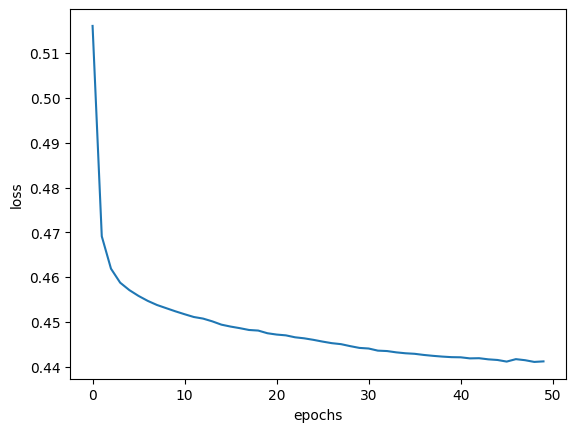

In [73]:
plt.plot(history.epoch, history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')

Text(0, 0.5, 'accuracy')

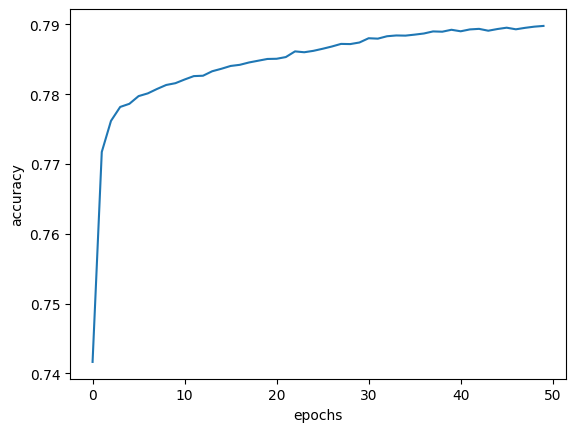

In [74]:
plt.plot(history.epoch, history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

In [75]:
model.evaluate(x_test, y_test)[1]

11288/11288 [==============================] - 4s 345us/step - loss: 0.4401 - accuracy: 0.7903


0.7903479337692261

In [77]:
xnew = np.array([[32, 16, 8, 1, 1, 1, 1, 1, 1, 1]])
xnew = scaler.transform(xnew)
ynew = model.predict(xnew)
print("x=%s, Predicted=%s" % (xnew[0], ynew[0]))

1/1 [==============================] - 0s 12ms/step
x=[3.20000000e+01 1.60000000e+01 7.27272727e-01 9.07279055e-01
 1.03199174e+00 1.00401606e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 4.01712904e-03], Predicted=[1.1393383e-22]


/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [78]:
model.save("NN_model_danceability.h5")
print("Save Model to disk.")


Save Model to disk.


/opt/homebrew/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [79]:
saved_model = load_model("NN_model_danceability.h5")

In [80]:
prediction = saved_model.predict(xnew)
print(prediction[0])

1/1 [==============================] - 0s 27ms/step
[1.1393383e-22]


In [42]:
y_pred

array([[0.9510289 ],
       [0.19556399],
       [0.7751479 ],
       ...,
       [0.7458064 ],
       [0.02069702],
       [0.00782112]], dtype=float32)

In [43]:
y_test

411791     1
756547     0
269317     0
197545     0
1164574    0
          ..
805066     0
655880     0
539224     1
464436     0
817363     0
Name: danceability, Length: 361208, dtype: int64

In [48]:
y_pred_new = y_pred

y_pred_new[y_pred_new >= 0.5] = 1
y_pred_new[y_pred_new < 0.5] = 0


cm=confusion_matrix(y_test, y_pred_new)

cm

array([[143339,  37003],
       [ 35836, 145030]])

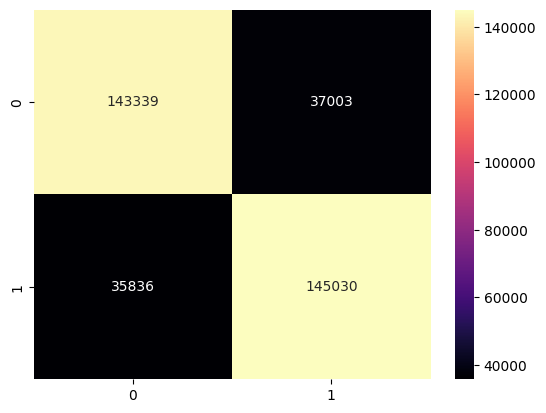

In [51]:
sns.heatmap(cm, fmt="d", annot=True, cmap="magma")#
plt.show()

In [86]:
pk.dump(model, open("nn.pkl", "wb")) 